## 이진 베이지안 모델

### 문제 (1) X, Y 데이터를 생성
* Sklearn의 make_classification() 함수: 분류에 쓰일 수 있는 데이터를 생성해 줌

In [1]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [2]:
X[:7]

array([[ 0.98683696, -1.11280151],
       [ 1.21570293,  0.80759391],
       [-0.42834558, -1.19625281],
       [-1.44074478, -0.60453305],
       [-2.01617446,  1.54079705],
       [ 0.83736843, -1.14051128],
       [-0.04857228,  0.44447402]])

In [3]:
Y[:7]

array([1, 1, 0, 0, 0, 1, 0])

### 문제 (2) X의 평균과 표준편차 계산해서 출력

In [4]:
X.mean(), X.std()

(0.02447970332558095, 1.2385107521250531)

### 문제 (3) 그래프 작성
* scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

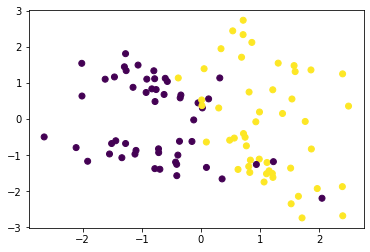

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='o', c=Y)
plt.show()

### 문제 (4) 훈련데이터, 테스트데이터 3:1로 분리
* train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### 문제 (5) 훈련데이터에 대하여 BernoulliNB 모델링
* X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

In [7]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)

In [8]:
bnb.fit(X_train, Y_train)

BernoulliNB()

### 문제 (6) 테스트데이터에 대하여 예측값을 출력
* 예측이 맞는지 실제값 Y와 비교해보자.

In [9]:
list(zip(bnb.predict(X_test),Y_test, X_test))

[(0, 0, array([-1.62032417,  1.10086293])),
 (1, 1, array([ 0.09171199, -0.64028477])),
 (0, 0, array([-0.92763394,  0.73305811])),
 (1, 0, array([ 1.22646961, -1.18380043])),
 (1, 1, array([1.38074062, 0.15084778])),
 (1, 1, array([ 1.1183292 , -1.20627563])),
 (1, 1, array([ 1.10990076, -1.51850038])),
 (1, 1, array([ 0.83736843, -1.14051128])),
 (0, 0, array([-1.27475656, -0.68097473])),
 (1, 1, array([ 1.2083265, -1.5107177])),
 (0, 0, array([-1.06397841,  1.4921753 ])),
 (0, 1, array([-0.38342932,  1.13521806])),
 (1, 1, array([2.39751399, 1.24881696])),
 (1, 1, array([ 0.74755334, -0.50703148])),
 (0, 0, array([-0.04857228,  0.44447402])),
 (1, 1, array([ 0.48682936, -0.58864379])),
 (0, 0, array([-1.2652478 ,  1.33819884])),
 (1, 1, array([1.21570293, 0.80759391])),
 (1, 1, array([ 1.71118161, -2.74251228])),
 (1, 1, array([ 0.98683696, -1.11280151])),
 (1, 1, array([0.53815241, 2.44040521])),
 (0, 0, array([-0.83089639,  0.83319073])),
 (1, 1, array([ 1.86868155, -0.83250436]))

In [10]:
# 이진값 넣어 예측값 출력
bnb.predict([[1,1], [1,-1], [-1,1], [-1,-1], [0,0]])

array([1, 1, 0, 0, 0])

### 문제 (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [11]:
bnb.score(X_test, Y_test)

0.88